In [ ]:
#### part 1 Data prerpocessing

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [37]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [38]:
# spliting the variable into x and y

x=dataset.iloc[:,3:13] #independent variable
y=dataset.iloc[:,13]  #dependent variable


In [39]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [40]:
#Create dummy variables

geography=pd.get_dummies(x["Geography"],drop_first=True)     # "drop_1st=true" delete 1st varibale in the dataset which is france
gender=pd.get_dummies(x['Gender'],drop_first=True)           # "drop_1st=true" delete 1st varibale in the dataset which is female

In [41]:
## Concatenate the Data Frames into x independent variable after creating dummy variable

x=pd.concat([x,geography,gender],axis=1)

In [42]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,True,False,True


In [43]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [44]:
## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)

In [45]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [46]:
# Feature Scaling  is used to perform data's in floating formate

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
###### Part 2 - Now let's make the ANN!

In [47]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [48]:
# Initialising the ANN
classifier = Sequential()

In [49]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer='he_normal',activation='relu',input_dim = 11)) # Change input_dim to 11
classifier.add(Dropout(0.3))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer= 'he_normal',activation='relu'))
classifier.add(Dropout(0.4))

# Adding the 3rd  hidden layer
classifier.add(Dense(units=15, kernel_initializer= 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

In [50]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 15)                  │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])   #binary cross entropy for binary output 1's and 0's

In [52]:
model_history = classifier.fit(
    x_train,
    y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=100
)


Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5483 - loss: 0.9847 - val_accuracy: 0.7452 - val_loss: 0.5924
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7474 - loss: 0.6030 - val_accuracy: 0.7955 - val_loss: 0.5306
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7838 - loss: 0.5480 - val_accuracy: 0.7955 - val_loss: 0.5149
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7909 - loss: 0.5255 - val_accuracy: 0.7955 - val_loss: 0.5099
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7980 - loss: 0.5220 - val_accuracy: 0.7955 - val_loss: 0.5068
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7940 - loss: 0.5263 - val_accuracy: 0.7955 - val_loss: 0.5025
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7855 - loss: 0.5286 - val_accuracy: 0.7955 - val_loss: 0.5002
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8005 - loss: 0.5018 - val_accu

In [53]:
# Part 3 - Making the predictions and evaluating the model

In [54]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1590,    5],
       [ 365,   40]])

In [58]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.815


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


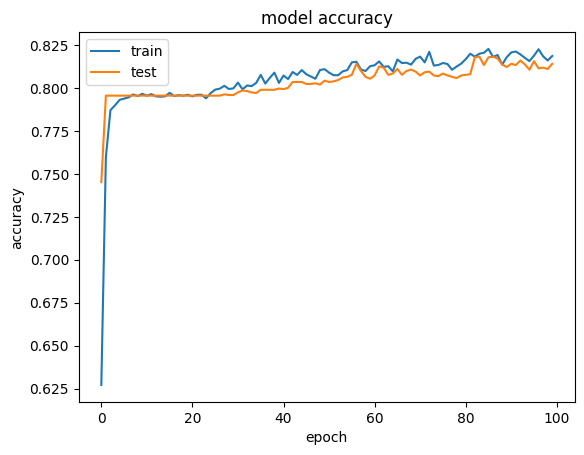

In [59]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

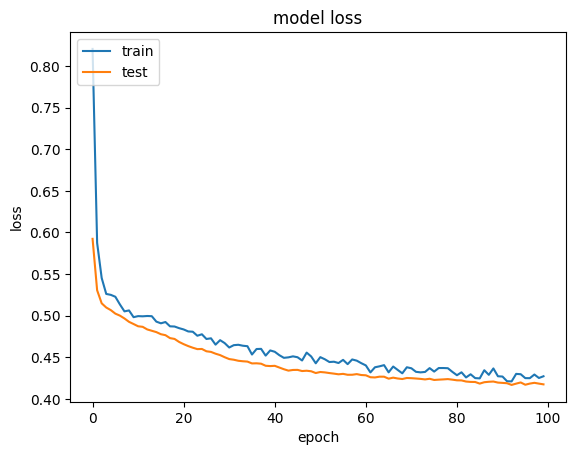

In [60]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##part 4 is done inbetweeb part 2 nd part 3

## hyper parameter tuning [How to Select how many hidden layer and neurons in a neural network]

In [62]:
!pip install scikeras


In [63]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV    #for hyper peram its using


In [64]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [ ]:
## create layer and activation function to perform hyper parametr tuning in ann

In [66]:
x_train.shape[1]

11

In [67]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))

      #output layer adding
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    #complining the ann model
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [72]:
from scikeras.wrappers import KerasClassifier

model = KerasClassifier(model=create_model, verbose=0)


In [73]:
layers = [[20], [40, 20], [45, 30, 15]]   #applying 1st 2nd and 3rd layer
activations = ['sigmoid', 'relu']       # use actiavtion fun either sigmoid or relu
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])

In [74]:
## applying grid search CV for hyper parameter tuning

grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
grid_result = grid.fit(x_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'